<a href="https://colab.research.google.com/github/gayatri5425/play-store-app-analysis-from-alma-better/blob/main/50_Startups_with_Multi_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
# importing the visulisation libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression





In [140]:
# importing the dateset
dataset= pd.read_csv("50_Startups.csv")

In [141]:
len (dataset)

50

In [142]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [143]:
dataset.shape

(50, 5)

In [144]:
dataset.size

250

In [145]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [146]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [147]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [148]:
dataset.columns.values

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'], dtype=object)

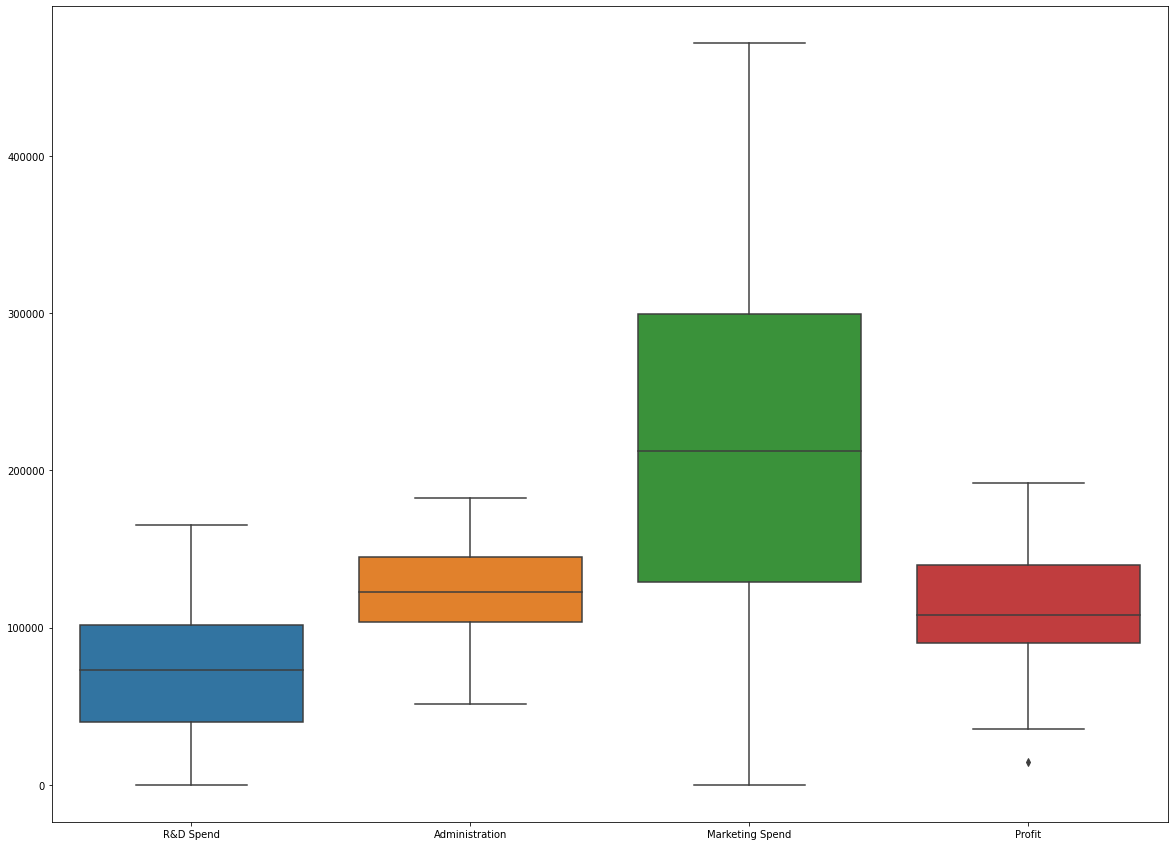

In [149]:
plt.figure(figsize=(20,15))
sns.boxplot(data = dataset)

In [150]:
# divide into indenpendent and dependent feature
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [151]:
# make state column as one  hot encoding using get_dummies
one_hot_encode = pd.get_dummies(x.State)
one_hot_encode.value_counts()

California  Florida  New York
0           0        1           17
1           0        0           17
0           1        0           16
dtype: int64

In [152]:
x.drop(['State'],axis=1,inplace= True)
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [153]:
x=pd.concat([x, one_hot_encode],axis=1)
x.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [154]:
# importing required libraries for predicting using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score

In [155]:
xtr,xte,ytr,yte = train_test_split(x , y ,test_size = 0.2 , random_state = 0)
model = LinearRegression()
fitting= model .fit(xtr , ytr)
ypred = model . predict(xtr)
res = r2_score(ytr , ypred)

In [156]:
res # training set accurancy

0.9501847627493607

In [157]:
ypred_test = model.predict(xte)
new_res = r2_score(yte , ypred_test)
new_res # testing score accurancy

0.9347068473282423

In [158]:
print('training accurancy:',res)
print('testing accurancy:',new_res)

training accurancy: 0.9501847627493607
testing accurancy: 0.9347068473282423


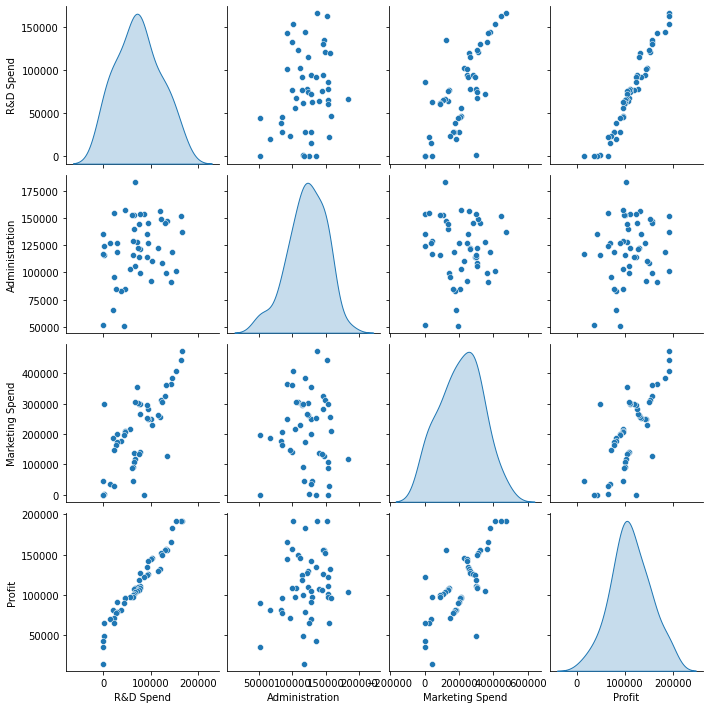

In [159]:
sns.pairplot(dataset,diag_kind='kde')

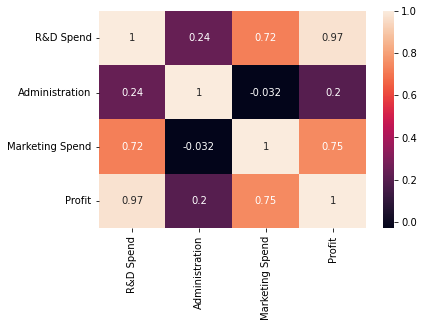

In [160]:
sns.heatmap(dataset.corr(),annot=True)

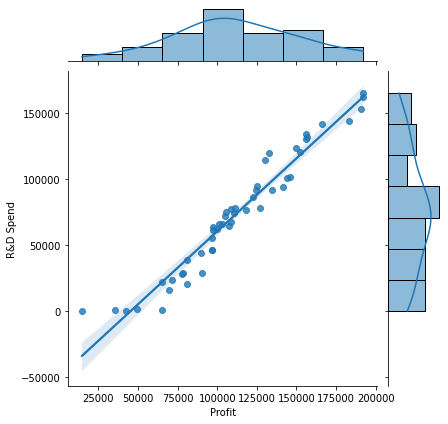

In [161]:
sns.jointplot(x=dataset['Profit'],
 y=dataset['R&D Spend'],kind='reg')
plt.show()             

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


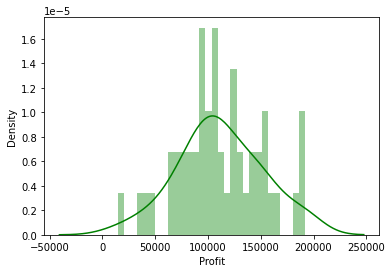

In [162]:
sns.distplot(dataset['Profit'],bins=30
 ,color='g')
plt.show()

In [163]:
dataset_prepared=dataset.copy()

In [164]:
# check for multi collinearity

In [165]:
# slicing features

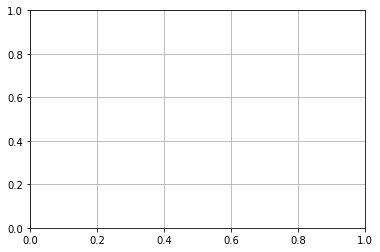

In [166]:

plt.grid()
plt.show()